# Исследование сервиса аренды самокатов "GoFast"

## Описание проекта

Нам передали данные о некоторых пользователях из нескольких городов популярного сервиса аренды самокатов 'GoFast', а также об их поездках. Требуется проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти.

Чтобы совершать поездки по городу, пользователи сервиса 'GoFast' пользуются мобильным приложением.

Сервисом можно пользоваться:
* без подписки 
    абонентская плата отсутствует;
    стоимость одной минуты поездки — 8 рублей;
    стоимость старта (начала поездки) — 50 рублей;

* с подпиской Ultra 
    абонентская плата — 199 рублей в месяц;
    стоимость одной минуты поездки — 6 рублей;
    стоимость старта — бесплатно.

## Описание данных

В основных данных есть информация о пользователях, их поездках и подписках.

#### Пользователи — users_go.csv

* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra).

#### Поездки — rides_go.csv

* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

#### Подписки — subscriptions_go.csv

* subscription_type	- тип подписки;
* minute_price	- стоимость одной минуты поездки по данной подписке;
* start_ride_price	- стоимость начала поездки;
* subscription_fee	- стоимость ежемесячного платежа.

<a id="Задачи_исследования"></a>

## Задачи исследования

### [Этап 1. Загрузка и изучение данных](#Этап_1)

* [1.1 Считайте CSV-файлы с данными с помощью библиотеки pandas и сохраните их в датафреймы.](#Читаем_данные)
* [1.2 Выведите первые строки каждого набора данных. Изучите общую информацию о каждом датафрейме.](#Изучаем_данные)

### [Этап 2. Предобработка данных](#Этап_2)

* [2.1 Приведите столбец date к типу даты pandas.](#Преоброзование_типов)
* [2.2 Создайте новый столбец с номером месяца на основе столбца date.](#Столбец_с_месяцем)
* [2.3 Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.](#Пропуски_дубли)

### [Этап 3. Исследовательский анализ данных](#Этап_3)

Опишите и визуализируйте общую информацию о пользователях и поездках:
* [3.1 частота встречаемости городов;](#Города)
* [3.2 соотношение пользователей с подпиской и без подписки;](#Соотношение)
* [3.3 возраст пользователей;](#Возраст)
* [3.4 расстояние, которое пользователь преодолел за одну поездку;](#Расстояние)
* [3.5 продолжительность поездок.](#Продолжительность)

### [Этап 4. Объединение данных](#Этап_4)

* [4.1 Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge();](#Объединение)
* [4.2 Создайте ещё два датафрейма из датафрейма, созданного на этапе 4.1:](#Новые_дф)
    * c данными о пользователях без подписки;
    * с данными о пользователях с подпиской.
* [4.3 Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий.](#Визуализируем)

### [Этап 5. Подсчёт выручки](#Этап_5)

* [5.1 Создайте датафрейм с агрегированными данными о поездках на основе датафрейма с объединёнными данными из шага 4: найдите суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц;](#Агрегируем)
* [5.2 В этот же датафрейм добавьте столбец с помесячной выручкой, которую принёс каждый пользователь. Для этого обратитесь к информации об условиях оплаты для подписчиков и тех, у кого нет подписки. Продолжительность каждой поездки в каждой строке исходного датафрейма для подсчёта стоимости округляется до следующего целого числа: например, значения 25.3, 25.5 и 26.0 должны быть преобразованы к 26.](#Кэш)

### [Этап 6. Проверка гипотез](#Этап_6)

Продакт-менеджеры сервиса хотят увеличить количество пользователей с подпиской. Для этого они будут проводить различные акции, но сначала нужно выяснить несколько важных моментов.
* [6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки;](#Гипотеза_1)
* [6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы;](#Гипотеза_2)
* [6.3. Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод;](#Гиротеза_3)
* [6.4. Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?](#Гипотеза_4)

<a id="Этап_1"></a>

## Этап 1: Загрузка данных 
#### Подключение библиотек

[Вернуться к задачам исследования](#Задачи_исследования)

In [2]:
#импорт необходимых библиотек 
import pandas as pd
import matplotlib.pyplot as plt   
from scipy import stats
import seaborn as sns

#### 1.1 Загрузка данных из файла

In [3]:
try:
    df_users_go = pd.read_csv('/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('/datasets/subscriptions_go.csv', sep = ',')
except Exception:
    df_users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv', sep = ',')
    df_rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', sep = ',')
    df_subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv', sep = ',')


In [4]:
df_users_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


In [5]:
df_users_go.head()

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


Данные, котороые хранятся в этом датафрейме 
* user_id - уникальный идентификатор пользователя;
* name - имя пользователя;
* age - возраст;
* city - город;
* subscription_type - тип подписки (free, ultra)

In [6]:
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


In [7]:
df_rides_go.head()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


Данные, которые хранятся в этом датафрейме 
* user_id - уникальный идентификатор пользователя;
* distance - расстояние, которое пользователь проехал в текущей сессии (в метрах);
* duration - продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»;
* date - дата совершения поездки.

In [8]:
df_subscriptions_go.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


In [9]:
df_subscriptions_go.head()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Данные, которые хранятся в этом датафрейме 
* subscription_type	- тип подписки;
* minute_price	- стоимость одной минуты поездки по данной подписке;
* start_ride_price	- стоимость начала поездки;
* subscription_fee	- стоимость ежемесячного платежа.

Вывод:
1 - В нашем распоряжении 3 датафрейма. С информацией о пользователях, их поездках и типе подписке 
2 - В датафрейме есть некорректный тип данных, необходимо исправить
3 - Проверить наличие пропусков и дубликатов 

#### Шаг 2. Предобработка данных

изменение типа данных

In [10]:
df_rides_go['date'] = pd.to_datetime(df_rides_go['date'])
df_rides_go.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Создание столбца на основе нового типа данных

In [11]:
df_rides_go['month'] = df_rides_go['date'].dt.month
df_rides_go.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


Проверка дубликатов

In [12]:
print(f'количество дубликатов в датафрейме df_users_go: {df_users_go.duplicated().sum()}')
print(f'количество дубликатов в датафрейме df_rides_go: {df_rides_go.duplicated().sum()}')
print(f'количество дубликатов в датафрейме df_subscriptions_go: {df_subscriptions_go.duplicated().sum()}')

количество дубликатов в датафрейме df_users_go: 31
количество дубликатов в датафрейме df_rides_go: 0
количество дубликатов в датафрейме df_subscriptions_go: 0


In [13]:
df_users_go.drop_duplicates(inplace=True)

In [14]:
print(f'количество дубликатов в датафрейме df_users_go: {df_users_go.duplicated().sum()}')

количество дубликатов в датафрейме df_users_go: 0


In [15]:
print(f'Пропущенные значения в df_users_go:\n{df_users_go.isnull().sum().sort_values()}')
print()
print(f'Пропущенные значения в df_rides_go:\n{df_rides_go.isnull().sum().sort_values()}')
print()
print(f'Пропущенные значения в df_subscriptions_go:\n{df_subscriptions_go.isnull().sum().sort_values()}')



Пропущенные значения в df_users_go:
user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

Пропущенные значения в df_rides_go:
user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

Пропущенные значения в df_subscriptions_go:
subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64


Вывод
Пропуски не обнаружены 
В датафрейме df_users_go удалили дублкаты 
В датафрейме df_rides_go поменяли тип данных в столбце date и создали на его основе столбец с месяцами

#### Шаг 3. Исследовательский анализ данных

Частота встречаемости городов

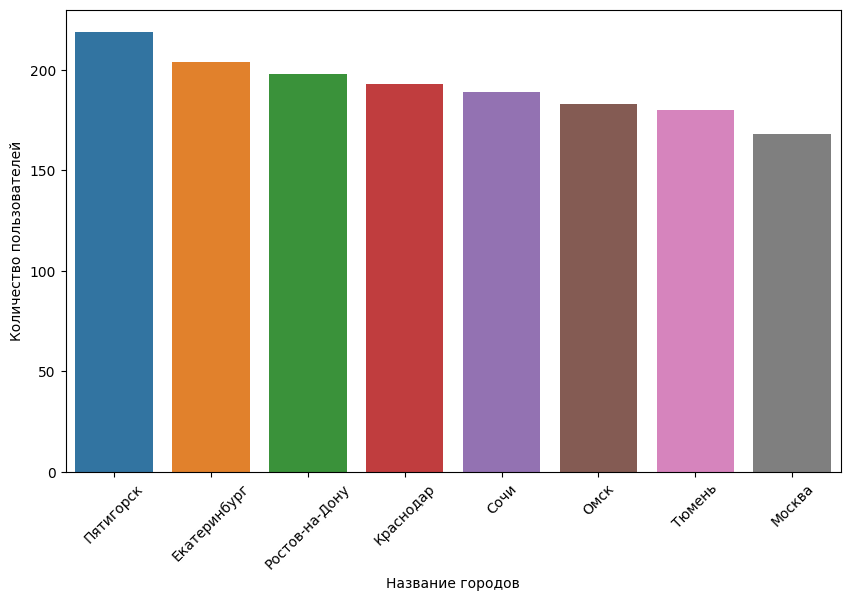

In [22]:
plt.figure(figsize=(10, 6))
city_count = df_users_go['city'].value_counts()
df_city_count = city_count.reset_index()
df_city_count.columns = ['city', 'count']
sns.barplot(x = 'city', y = 'count', data = df_city_count)
plt.xticks(rotation=45)
plt.xlabel('Название городов')
plt.ylabel('Количество пользователей')

plt.show()


#### Шаг 4. Объединение данных

#### Шаг 5. Подсчёт выручки

#### Шаг 6. Проверка гипотез

#### Шаг 7. Распределения